# A Predictive Marketing Strategy  
author: "R.H. Amezqueta"  
date: "2024-03-15"

This project is part of my data science portfolio. Check out the full summary, designed to be presented to non-technical teams: https://rhamezqueta.wixsite.com/portfolio/a-predictive-marketing-strategy

# **Overview**

This project delves into the sales trends of an e-commerce company, focusing on its sales information. Through a deep analysis, it uncovers distinct behavioral patterns in consumer purchases. These patterns present a significant opportunity to implement a predictive marketing strategy aimed at enhancing sales performance and potentially increasing the company's revenue. By identifying when and what consumers are more likely to buy, the project lays the groundwork for targeted marketing efforts that align with customer preferences and behaviors, setting the stage for more effective engagement and growth.

# **Disclaimer on Use of Data**  
The dataset incorporated into this portfolio is used solely for demonstrative and educational purposes. My intention in presenting this portfolio is to showcase my skills and abilities. At no point do I claim ownership over the original data or seek to derive commercial revenue from its use.

#  **Introduction** 

In the world of e-commerce, understanding consumer behavior is not just an advantage, but a necessity for success. Companies are increasingly looking for ways to capitalize on emerging trends and consumer preferences. This project wants to analyze sales data from an e-commerce company, with the aim of identifying behavioral patterns that can inform a predictive marketing strategy. By exploring these patterns, I seek to uncover insights that could enable the company to proactively respond to consumer needs, personalize marketing efforts, and ultimately, boost sales. The findings from this analysis are expected to leverage consumer behavior, enhancing the company's ability to engage with its customers in a more meaningful and impactful way.

# **Methodology and Structure:**
  
- Data Collection: Gathering sales data from the company.   
- [Data Cleaning and Preprocessing:](#Data-Cleaning-and-Preprocessing) The data undergoes cleaning and preprocessing to remove any inaccuracies, duplicates, or irrelevant information.  
- [Exploratory Data Analysis (EDA):](#Exploratory-Data-Analysis)  Exploring the data to identify initial patterns, trends, and anomalies.   
- [Behavioral Pattern Identification:](#Behavioral-Pattern-Identification) Leveraging analytics, the project identifies specific purchasing behaviors.   
- [Conclusions:](#Conclusions) Final summary. 
- [Strategy Development:](#Strategy-Development) Based on the insights and predictions derived from the data, a predictive marketing strategy is formulated.  
- [Implementation and Testing:](#Implementation-and-Testing) A pilot phase is recommended to test the effectiveness of the predictive marketing strategy.

# **Limitations**   

While this project provides insights into consumer purchasing behaviors, it's important to acknowledge certain limitations. A notable constraint is the absence of economic information related to sales. The data analyzed primarily focuses on the patterns and frequencies of purchases, including product categories, reordering rates, and timing of transactions, without incorporating financial metrics such as sales revenue, profit margins, or cost of goods sold.  
This limitation means that while the purchasing patterns of clients can be effectively identified and analyzed , drawing direct correlations between these patterns and the financial performance of the company is challenging. Understanding the economic impact of different consumer behaviors would offer a more holistic view of the business landscape. This information could significantly enhance the predictive marketing strategy by allowing for more nuanced decisions that consider both consumer behavior and financial outcomes.


In [1]:
library(data.table)
library(dplyr)
library(dataPreparation)
library(inspectdf)
library(ggplot2)
library(RColorBrewer)
library(tidyr)
library(purrr)
library(arules)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


dataPreparation 1.1.1

Type data_preparation_news() to see new features/changes/bug fixes.


Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ readr     2.1.4     
── Co

In [2]:
# Load data
data <- read.csv('/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv')

### **Data Cleaning and Preprocessing**

In [3]:
# DataFrame summary
head(data)

#Type of variables
str(data)

# Sumary of variables
summary(data)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,2425083,49125,1,2,18,NA,17,1,0,13,pantry,baking ingredients
2,2425083,49125,1,2,18,NA,91,2,0,16,dairy eggs,soy lactosefree
3,2425083,49125,1,2,18,NA,36,3,0,16,dairy eggs,butter
4,2425083,49125,1,2,18,NA,83,4,0,4,produce,fresh vegetables
5,2425083,49125,1,2,18,NA,83,5,0,4,produce,fresh vegetables
6,2425083,49125,1,2,18,NA,91,6,0,16,dairy eggs,soy lactosefree


'data.frame':	2019501 obs. of  12 variables:
 $ order_id              : int  2425083 2425083 2425083 2425083 2425083 2425083 2425083 2425083 2425083 1944304 ...
 $ user_id               : int  49125 49125 49125 49125 49125 49125 49125 49125 49125 162867 ...
 $ order_number          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ order_dow             : int  2 2 2 2 2 2 2 2 2 3 ...
 $ order_hour_of_day     : int  18 18 18 18 18 18 18 18 18 17 ...
 $ days_since_prior_order: num  NA NA NA NA NA NA NA NA NA NA ...
 $ product_id            : int  17 91 36 83 83 91 120 59 35 37 ...
 $ add_to_cart_order     : int  1 2 3 4 5 6 7 8 9 1 ...
 $ reordered             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ department_id         : int  13 16 16 4 4 16 16 15 12 1 ...
 $ department            : chr  "pantry" "dairy eggs" "dairy eggs" "produce" ...
 $ product_name          : chr  "baking ingredients" "soy lactosefree" "butter" "fresh vegetables" ...


    order_id          user_id        order_number      order_dow    
 Min.   :     10   Min.   :     2   Min.   :  1.00   Min.   :0.000  
 1st Qu.: 852649   1st Qu.: 51584   1st Qu.:  5.00   1st Qu.:1.000  
 Median :1705004   Median :102690   Median : 11.00   Median :3.000  
 Mean   :1707013   Mean   :103067   Mean   : 17.15   Mean   :2.735  
 3rd Qu.:2559031   3rd Qu.:154600   3rd Qu.: 24.00   3rd Qu.:5.000  
 Max.   :3421080   Max.   :206209   Max.   :100.00   Max.   :6.000  
                                                                    
 order_hour_of_day days_since_prior_order   product_id     add_to_cart_order
 Min.   : 0.00     Min.   : 0.00          Min.   :  1.00   Min.   :  1.000  
 1st Qu.:10.00     1st Qu.: 5.00          1st Qu.: 31.00   1st Qu.:  3.000  
 Median :13.00     Median : 8.00          Median : 83.00   Median :  6.000  
 Mean   :13.44     Mean   :11.39          Mean   : 71.21   Mean   :  8.363  
 3rd Qu.:16.00     3rd Qu.:15.00          3rd Qu.:107.00   3rd 

Converting day-of-week numbers to named factors enhances data interpretability, ensuring models treat these days as categorical variables rather than numerical ones. Also, the rest of character variables will be convert to factors since this ensures the data is correctly interpreted and analyzed in statistical models, enhancing the quality and effectiveness of predictive analyses.

In [4]:
# Changing the column 'order_dow' to the name of the week and factor
# Vector of days of the week (assuming Monday as the first one)
days_of_week <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
# Maps integers to names
data$order_dow <- factor(data$order_dow, levels = 0:6, labels = days_of_week)
# Converts the variable to factor
data$order_dow <- as.factor(data$order_dow)


# Converting the character variables to factor 
char_vars <- c("department", "product_name")
data[char_vars] <- lapply(data[char_vars], as.factor)

# Checking changes
str(data)

'data.frame':	2019501 obs. of  12 variables:
 $ order_id              : int  2425083 2425083 2425083 2425083 2425083 2425083 2425083 2425083 2425083 1944304 ...
 $ user_id               : int  49125 49125 49125 49125 49125 49125 49125 49125 49125 162867 ...
 $ order_number          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ order_dow             : Factor w/ 7 levels "Monday","Tuesday",..: 3 3 3 3 3 3 3 3 3 4 ...
 $ order_hour_of_day     : int  18 18 18 18 18 18 18 18 18 17 ...
 $ days_since_prior_order: num  NA NA NA NA NA NA NA NA NA NA ...
 $ product_id            : int  17 91 36 83 83 91 120 59 35 37 ...
 $ add_to_cart_order     : int  1 2 3 4 5 6 7 8 9 1 ...
 $ reordered             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ department_id         : int  13 16 16 4 4 16 16 15 12 1 ...
 $ department            : Factor w/ 21 levels "alcohol","babies",..: 17 8 8 20 20 8 8 7 14 11 ...
 $ product_name          : Factor w/ 134 levels "air fresheners candles",..: 7 120 18 54 54 120 134 22 105 72 ...


### **Exploratory Data Analysis**

In [5]:
# Unique users
num_unique_users <- data %>%
  summarise(n_distinct(user_id)) %>%
  pull()
print(paste('Total users:', num_unique_users))

# Unique departments
num_unique_departments <- data %>%
  summarise(n_distinct(department)) %>%
  pull()
print(paste('Total departments:', num_unique_departments))

# Unique products
num_unique_products <- data %>%
  summarise(n_distinct(product_name)) %>%
  pull()
print(paste('Total products:', num_unique_products))

[1] "Total users: 105273"
[1] "Total departments: 21"
[1] "Total products: 134"


Warning message:
“Columns with 0 variance found: reordered”


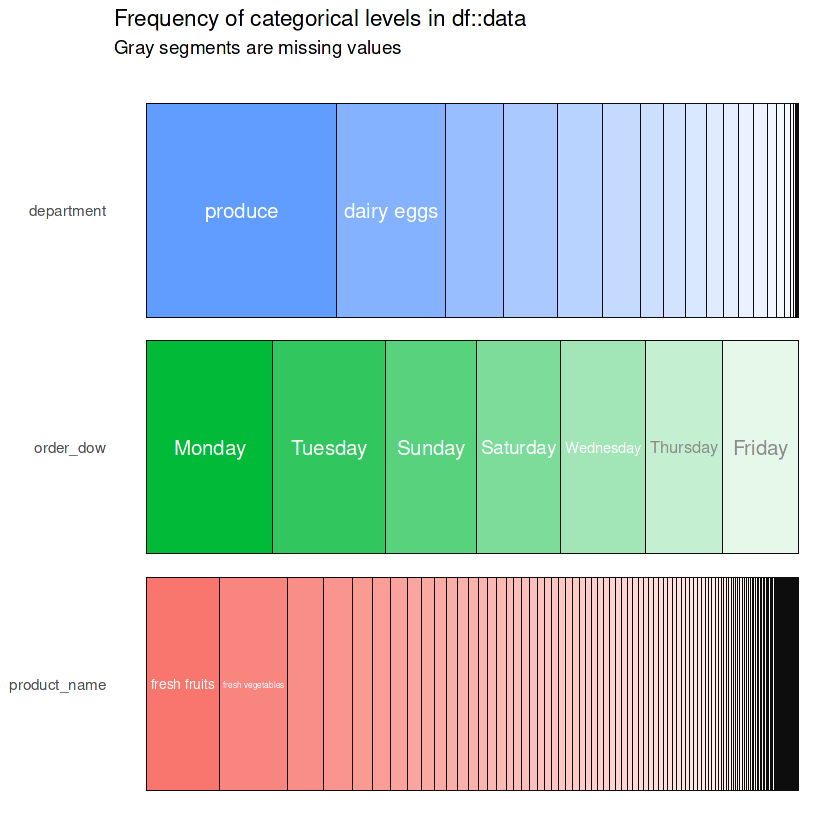

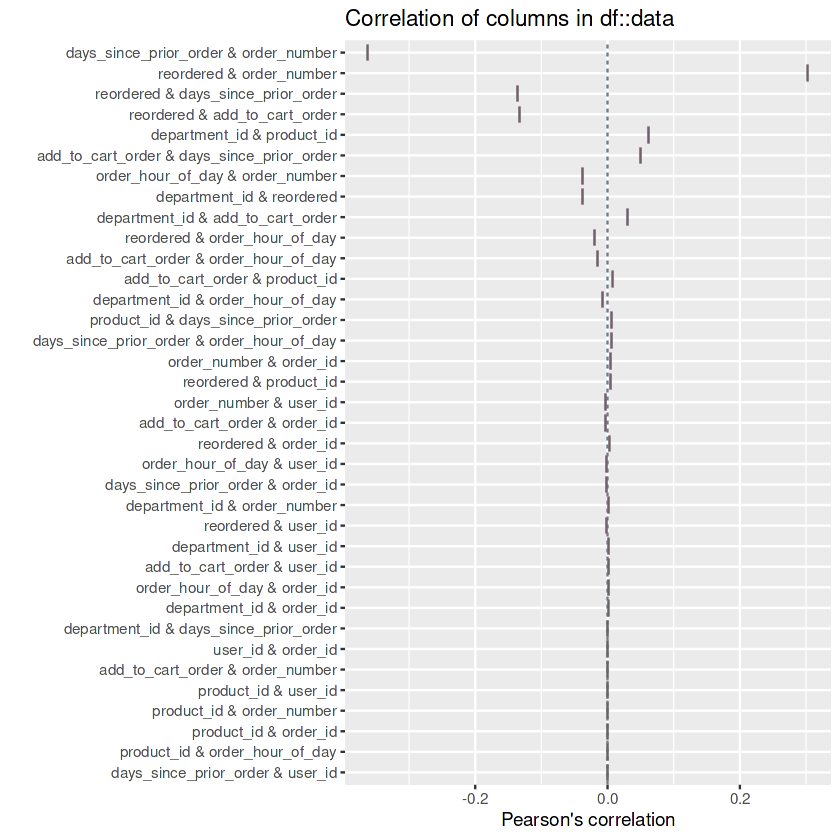

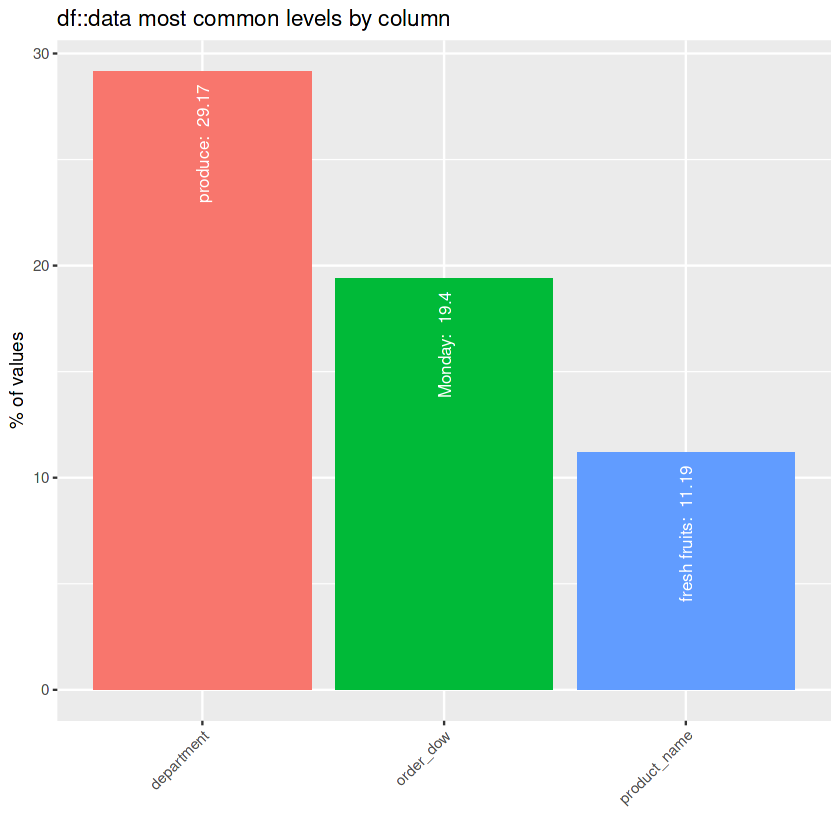

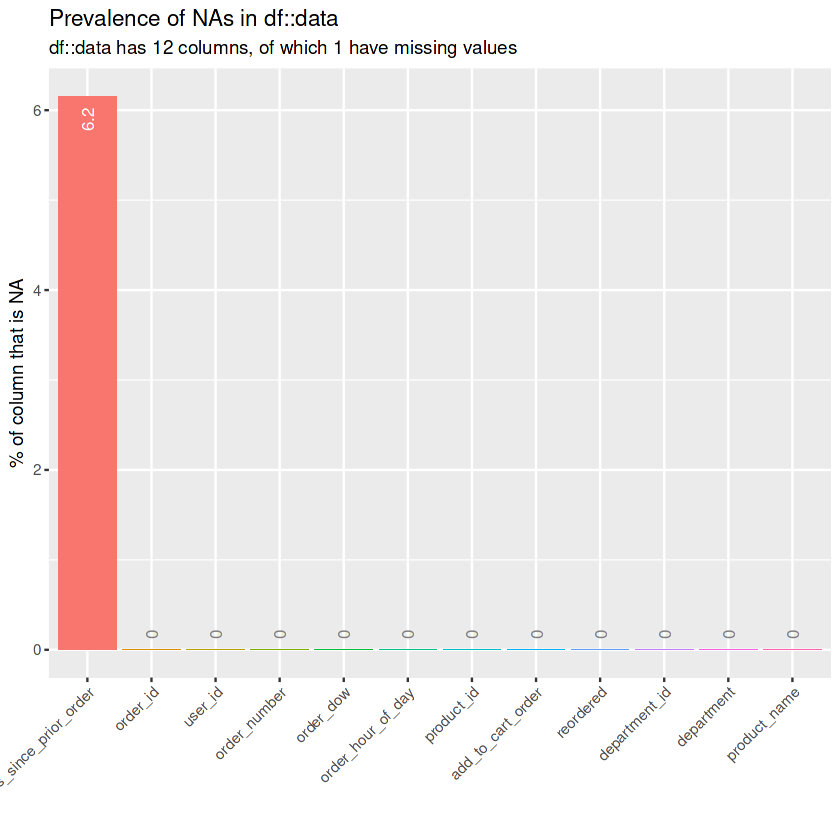

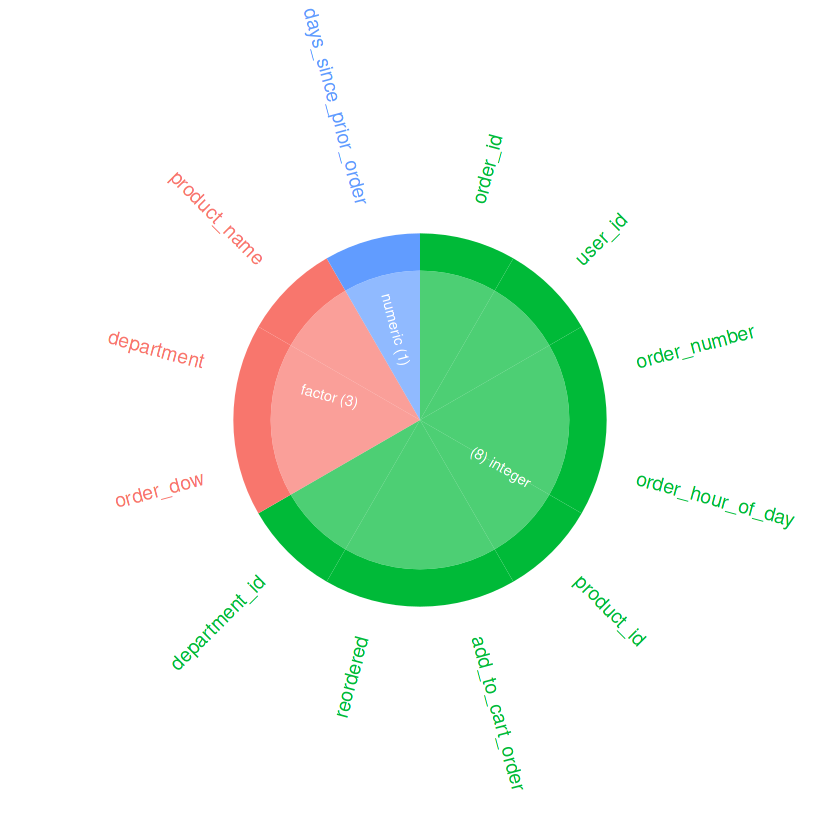

In [6]:
# Categorical variables analysis  
var <- inspect_cat(data)
show_plot(var) 

# Correlation between numeric columns  
var <- inspect_cor(data)
show_plot(var)
 
# Levels of categorical variables 
var <- inspect_imb(data)
show_plot(var)

# n/a checking
var <- inspect_na(data)
show_plot(var)

# Type of variables
var <- inspect_types(data)
show_plot(var)

There's a portion (6.2%) of 'missing data'. I'm gonna opt for a cautious approach to data imputation, prioritizing data integrity and the potential insights that unaltered data might offer.
  
Aspects we can extract from the previous analysis:  
- The department with the highest purchase frequency is "produce" (29.17%).  
- Monday is the day with the highest number of purchases (19.4% of all purchases).  
- The most purchased type of product is 'fresh fruits' (11.19%).  
- The numerical variables do not show a relevant linear correlation. 
  
Let's represent now these aspects in a more "aesthetically pleasing" way.

### **Behavioral Pattern Identification**

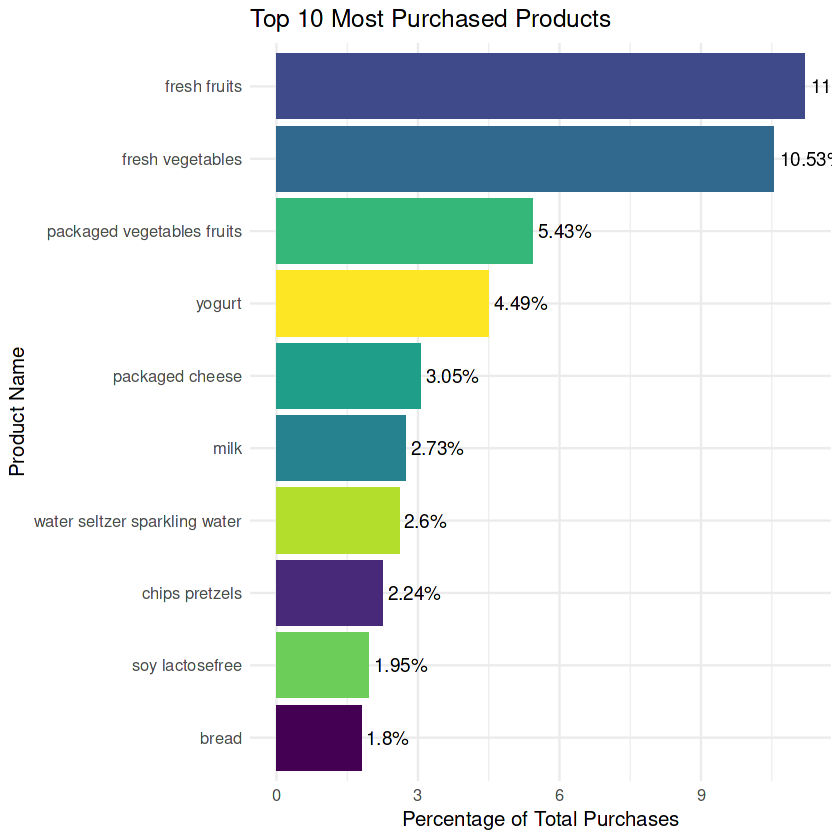

In [7]:
# Total number of purchases for percentage calculation
total_purchases <- sum(table(data$product_name))

# Top 10 most purchased products and their purchase counts
top_products <- data %>%
  group_by(product_name) %>%
  summarise(count = n()) %>%
  mutate(percentage = (count / total_purchases) * 100) %>%
  arrange(desc(count)) %>%
  slice_max(order_by = count, n = 10)

# Plotting the top 10 most purchased products with percentages
ggplot(top_products, aes(x = reorder(product_name, count), y = percentage, fill = product_name)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  coord_flip() +  
  theme_minimal() +  
  labs(x = "Product Name", y = "Percentage of Total Purchases", title = "Top 10 Most Purchased Products") +
  scale_fill_viridis_d() +  # Viridis color palette 
  geom_text(aes(label = paste0(round(percentage, 2), "%")), position = position_dodge(width = 0.9), hjust = -0.1) +
  theme(text = element_text(size = 12))  # Text size


This barplot shows the top-10 most purchased products in the store and the percentage of the total purchases they represent. It will be a good starting point to understand the purchasing patterns of the customers. Some of the insight we can extract are:    
  - The high sales of fresh fruits and vegetables underscore a significant consumer demand for healthy and fresh options (potentially health-conscious customer base or a trend towards healthier eating habits). 
  - The presence of lactose-free options suggests market segmentation, with potential growth in catering to specific dietary requirements.    
  - Snacks like chips and pretzels shows there is still a market for non-essential, pleasure-based purchases.

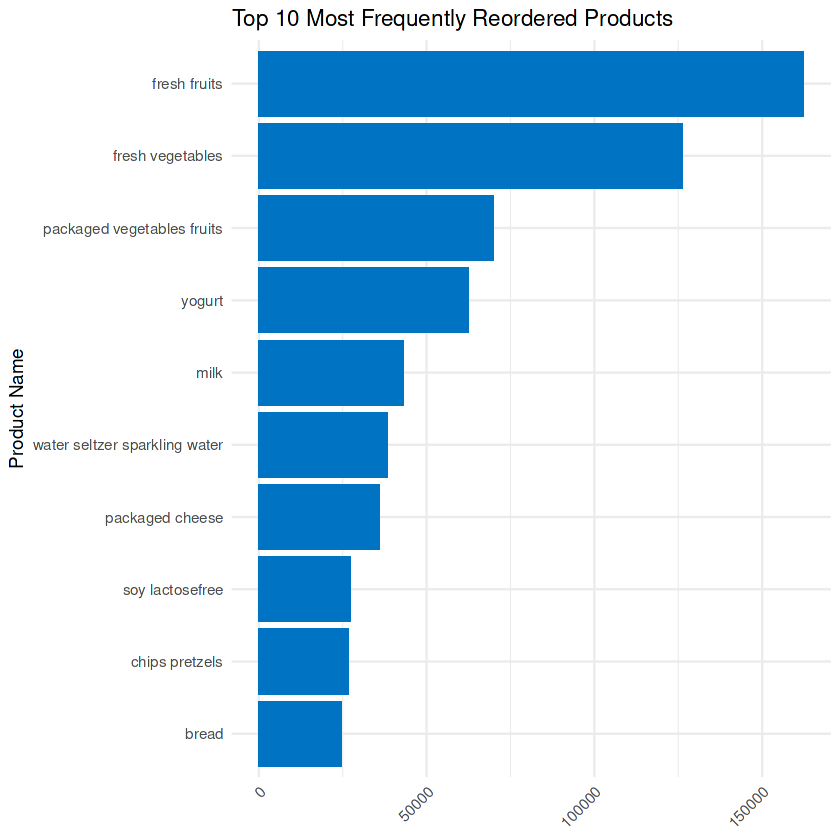

In [8]:
# Top 10 products reordered
top_reordered_products <- data %>%
  filter(reordered == 1) %>%
  group_by(product_name) %>%
  summarise(reorder_count = n(), .groups = 'drop') %>%
  arrange(desc(reorder_count)) %>%
  top_n(10, reorder_count)

#Plotting the top 10 products reordered
ggplot(top_reordered_products, aes(x = reorder(product_name, reorder_count), y = reorder_count)) +
  geom_bar(stat = "identity", fill = "#0073C2FF") +
  coord_flip() +  
  theme_minimal() +
  labs(x = "Product Name", y = "Reorder Count", title = "Top 10 Most Frequently Reordered Products") +
  theme(axis.title.x = element_blank(), axis.ticks.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1))

In this case, we can see the top-10 most frequently reordered products. This analysis, especially when compared with the previous one, can offer deeper insights into consumer behavior:  
- Fresh fruits and fresh vegetables remain at the top in both charts. This consistency is indicative of staple products in consumers' diets, which suggests a reliable, ongoing demand.  
- This reorder rates can be used to tailor the marketing strategies, such as reminders to repurchase, or targeted discounts to encourage further reorders.

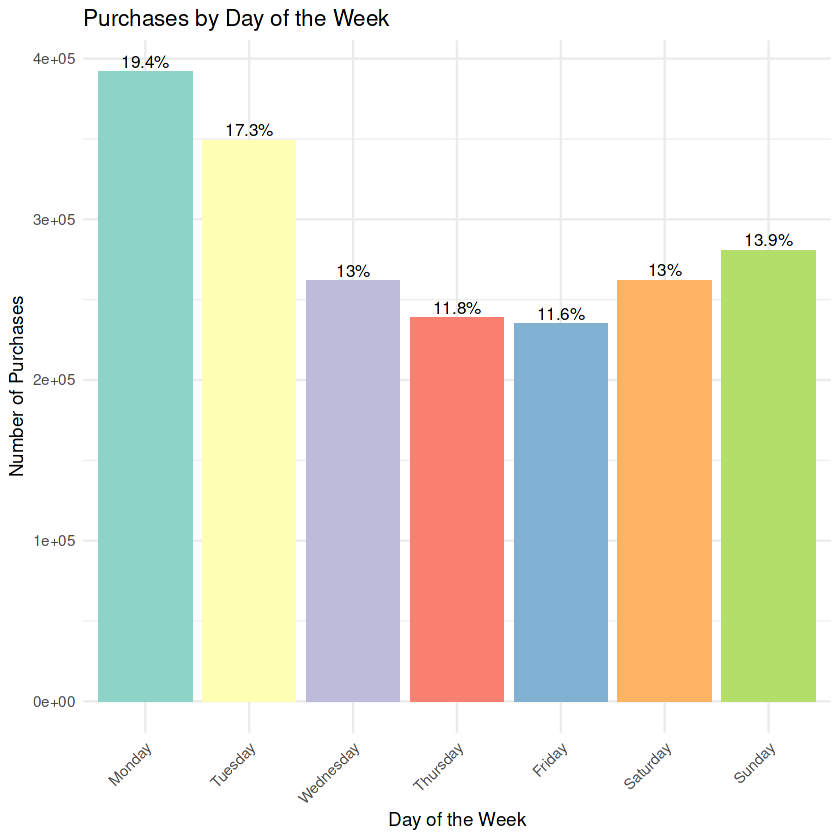

In [9]:
# Number of purchases for each day and percentages
purchases_by_day <- data %>%
  group_by(order_dow) %>%
  summarise(purchases = n()) %>%
  mutate(percentage = (purchases / total_purchases) * 100) %>%
  arrange(desc(purchases))

# Plotting the purchases by day of the week
ggplot(purchases_by_day, aes(x = order_dow, y = purchases, fill = order_dow)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), vjust = -0.3, size = 3.5) +
  theme_minimal() +
  labs(x = "Day of the Week", y = "Number of Purchases", title = "Purchases by Day of the Week") +
  scale_fill_brewer(palette = "Set3", guide = 'none') +  
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The barplot shows the distribution of purchases across different days of the week, with each bar representing the percentage of total purchases made on that particular day. 
As we can see, the highest percentage of purchases occur at the beginning of the week, especially on Monday, with 19.4% of the total purchases. This could suggest that consumers tend to shop online as a start-of-week activity or to prepare for the week ahead. 
Knowing that Mondays and Tuesdays have the highest purchase percentages, the company could schedule major promotions or launch new products on these days to maximize exposure and sales. Also, since consumer buying behavior is less active during the midweek, it could be an opportunity for targeted marketing efforts to boost sales on these days.

In [10]:
# Products per day 
purchases_by_product_day <- data %>%
  group_by(order_dow, product_name) %>%
  summarise(purchases = n(), .groups = 'drop') %>%
  arrange(order_dow, desc(purchases))

# Filters top-purchased product for each day
top_product_per_day <- purchases_by_product_day %>%
  group_by(order_dow) %>%
  slice_max(order_by = purchases, n = 3) %>%
  ungroup()

# Result
print(top_product_per_day)

# A tibble: 21 × 3
   order_dow product_name               purchases
   <fct>     <fct>                          <int>
 1 Monday    fresh vegetables               46643
 2 Monday    fresh fruits                   44727
 3 Monday    packaged vegetables fruits     23169
 4 Tuesday   fresh fruits                   41126
 5 Tuesday   fresh vegetables               36440
 6 Tuesday   packaged vegetables fruits     19230
 7 Wednesday fresh fruits                   28830
 8 Wednesday fresh vegetables               26481
 9 Wednesday packaged vegetables fruits     13919
10 Thursday  fresh fruits                   26102
# ℹ 11 more rows


Fresh vegetables, fresh fruits, and packaged vegetables/fruits consistently rank as the top three products purchased across the week. This shows, once again, that there is a consistent daily demand for fresh and packaged produce, suggesting a strong and stable market for healthy food options.This can can be leveraged for cross-selling opportunities. For example, customers purchasing fresh fruits and vegetables could be targeted with promotions for related items such as salad dressings, cooking oils, or health-focused snacks.
Since these products are daily essentials for customers, the company should consider a focused marketing strategy, highlighting, for example, the freshness, quality and value of their produce to retain existing customers and attract new ones. Also, as an extra, there could be an opportunity to enhance the company's brand reputation and customer loyalty by emphasizing sustainable practices and local sourcing, which could be appealing to consumers interested in fresh produce. 
In general, the prominence of fresh and packaged produce indicates their critical role in the company's sales strategy, requiring focused attention on maintaining quality, managing inventory efficiently, and leveraging these products for broader marketing and sales initiatives.

# A tibble: 7 × 2
  order_dow avg_products
  <fct>            <dbl>
1 Monday            13.5
2 Tuesday           12.3
3 Wednesday         11.1
4 Thursday          10.7
5 Friday            10.8
6 Saturday          11.5
7 Sunday            12.5


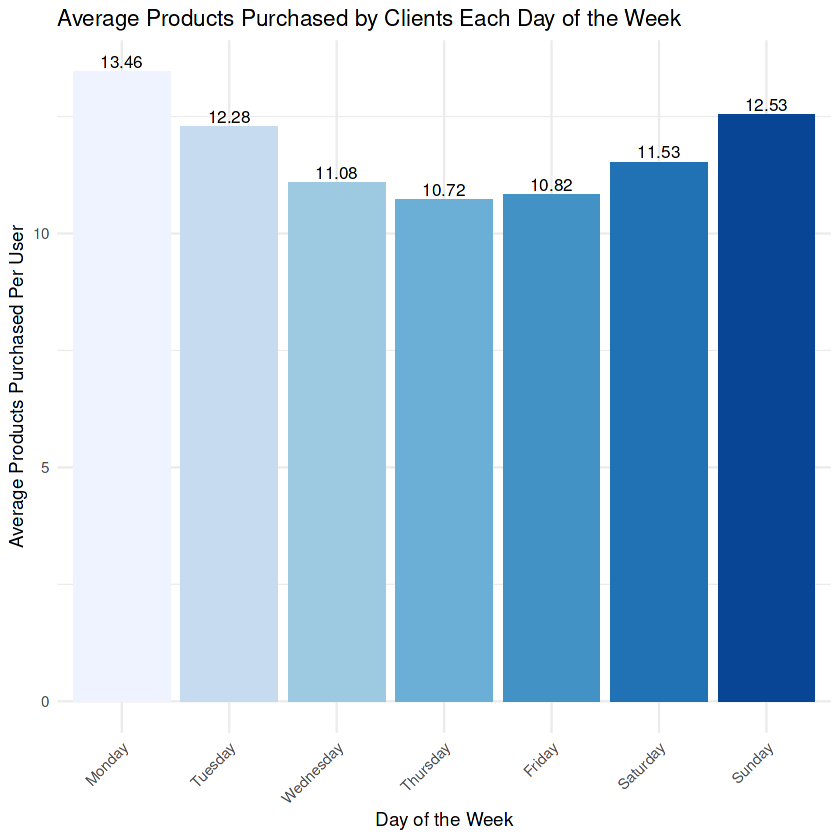

In [11]:
avg_products_per_user_day <- data %>%
  group_by(order_dow, user_id) %>%
  summarise(products_count = n(), .groups = 'drop') %>%
  group_by(order_dow) %>%
  summarise(avg_products = mean(products_count), .groups = 'drop')

# View the result
print(avg_products_per_user_day)


palette <- brewer.pal(n = length(unique(avg_products_per_user_day$order_dow)), name = "Blues")

# Plotting with the new color palette and annotations
ggplot(avg_products_per_user_day, aes(x = order_dow, y = avg_products, fill = order_dow)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  geom_text(aes(label = round(avg_products, 2)), vjust = -0.3, size = 3.5) +  # Adding text annotations
  scale_fill_manual(values = palette) +  # Applying the "Spectral" palette
  theme_minimal() +
  labs(x = "Day of the Week", y = "Average Products Purchased Per User", title = "Average Products Purchased by Clients Each Day of the Week") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x labels for better readability

This barplot shows the variation in the number of items customers buy on different days. There's a clear trend where shopping behavior fluctuates throughout the week, with Monday and Sunday seeing the highest average number of products purchased per user.As we saw before, Tuesdays have the second highest percentage in purchases, but this time Sundays stand as the second day with the highest number of items customers buy. 
  The  drop in the average number of items purchased from Tuesday through Friday could imply that customers are less inclined to make larger purchases midweek, potentially due to work schedules or smaller midweek needs.  

The variability in the number of items purchased across the week may lead to some strategic actions:  
- Running special deals on Mondays and Sundays could capitalize on the increased traffic and basket size.  
- On days with lower average purchases, engagement tactics such as targeted emails or flash sales could be used to encourage customers to buy a wider variety of items.  
- Personalized product recommendations could be more aggressively promoted during midweek to increase the variety of items purchased.  
- Loyalty points or rewards could be increased on slower days to incentive higher purchase volumes

`summarise()` has grouped output by 'order_dow'. You can override using the
`.groups` argument.


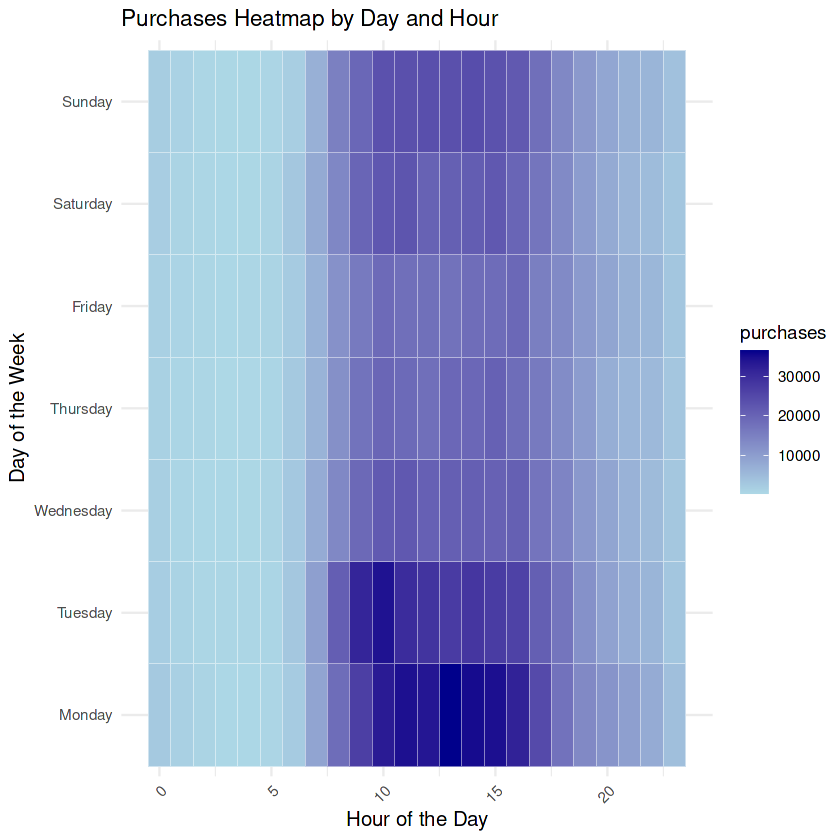

In [12]:
# Day of the week and hour of the day
purchases_by_day_hour <- data %>%
  group_by(order_dow, order_hour_of_day) %>%
  summarise(purchases = n()) %>%
  ungroup()

# Creates the heatmap
ggplot(purchases_by_day_hour, aes(x = order_hour_of_day, y = order_dow, fill = purchases)) +
  geom_tile(color = "white") +  # Use geom_tile for the heatmap squares
  scale_fill_gradient(low = "lightblue", high = "darkblue") +  
  labs(x = "Hour of the Day", y = "Day of the Week", title = "Purchases Heatmap by Day and Hour") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  
        axis.title = element_text(size = 12)) 

The heat map visualizes the number of purchases made across different hours of the day for each day of the week. The intensity of the color indicates the volume of purchases, with darker shades representing higher numbers of purchases.
As we can see, the peak hours show a relatively high consistency across the week. Monday and Tuesday have the darkest colors, which makes sense since these two days have the highest percentage of purchases each week. The peak hours can be set from 8 a.m. to 5p.m. 

Implications:  
- This peak hours are vital for scheduling real-time promotions, flash sales, and live customer support.  
- By knowing when customers are most likely to shop, the company can strategically place advertisements to increase visibility and conversion rates.  
- Slower hours with fewer purchases could be targeted with special engagement strategies like personalized offers to stimulate demand.  
- Dynamic pricing strategies could be considered, raising prices slightly during high-demand periods and offering discounts during off-peak times to balance demand and potentially increase margins.  
- The platform needs to ensure that their website and app can handle increased traffic during peak hours without technical issues.  

[1] "Mean:  13.1393752233086"
[1] "Median:  10"
[1] 13.13938


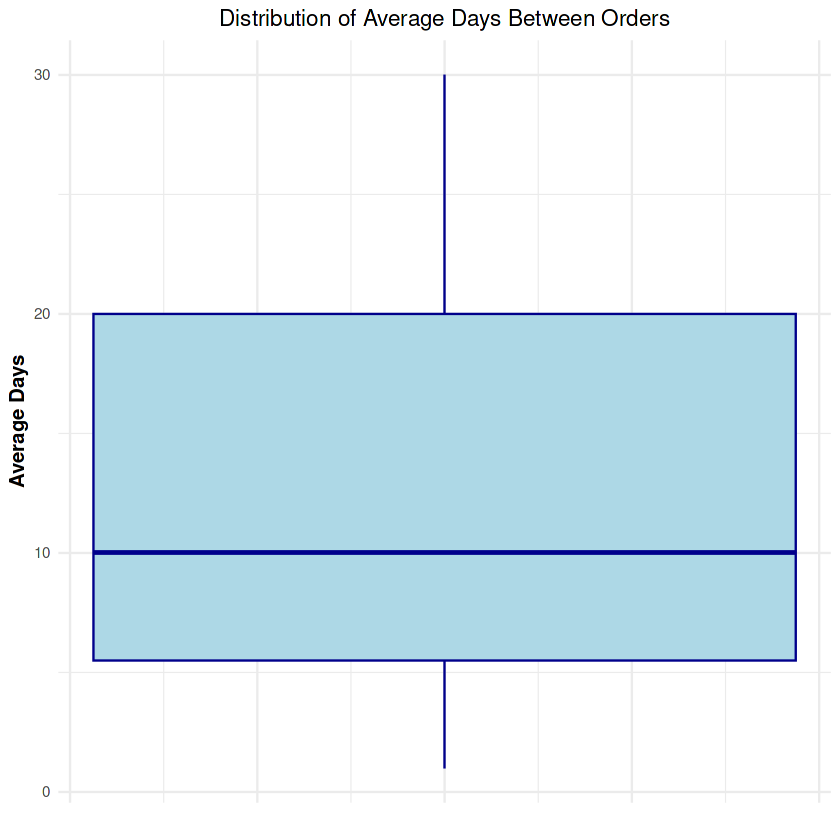

In [13]:
data_org <- data %>%
  arrange(user_id, order_id)

# Calculate the difference between orders for each user
data_with_diffs <- data_org %>%
  group_by(user_id) %>%
  mutate(time_between_orders = diff(c(0, days_since_prior_order))) %>%
  filter(time_between_orders > 0) %>%
  ungroup()

# Now, calculate the average days between orders for each user
avg_days_between_orders <- data_with_diffs %>%
  group_by(user_id) %>%
  summarise(average_days = mean(time_between_orders, na.rm = TRUE), .groups = 'drop') 

# Overall average across all users
overall_avg_days <- mean(avg_days_between_orders$average_days, na.rm = TRUE)
overall_median_days <- median(avg_days_between_orders$average_days, na.rm = TRUE)
print(paste("Mean: ", overall_avg_days))
print(paste("Median: ", overall_median_days))


print(overall_avg_days)

# Distribution of Average Days Between Orders
ggplot(avg_days_between_orders, aes(y = average_days)) +
  geom_boxplot(fill = "lightblue", color = "darkblue") +
  theme_minimal() +
  labs(title = "Distribution of Average Days Between Orders", x = "", y = "Average Days") +
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.y = element_text(size = 12, face = "bold"),
        axis.text.x = element_blank(), 
        axis.ticks.x = element_blank()) 

The average days between orders is 13.14,and the median is 10 days. This information suggests while most customers (50%) reorder within a shorter interval (around 10 days or less), there's a significant portion of customers who take longer to place their next order. It could be interesting for the company to apply some actions in order to increase the purchasing frequency. Some suggestion are:  
  - Scheduling targeted promotions or reminders slightly before this period to encourage reordering. For customers who tend to order less frequently, personalized promotions can be sent based on their unique ordering patterns.  
  - Implementing loyalty programs: rewarding customers based on their ordering frequency can increase customer retention. For instance, offering discounts or free products for every tenth order can motivate customers to maintain or increase their ordering frequency.

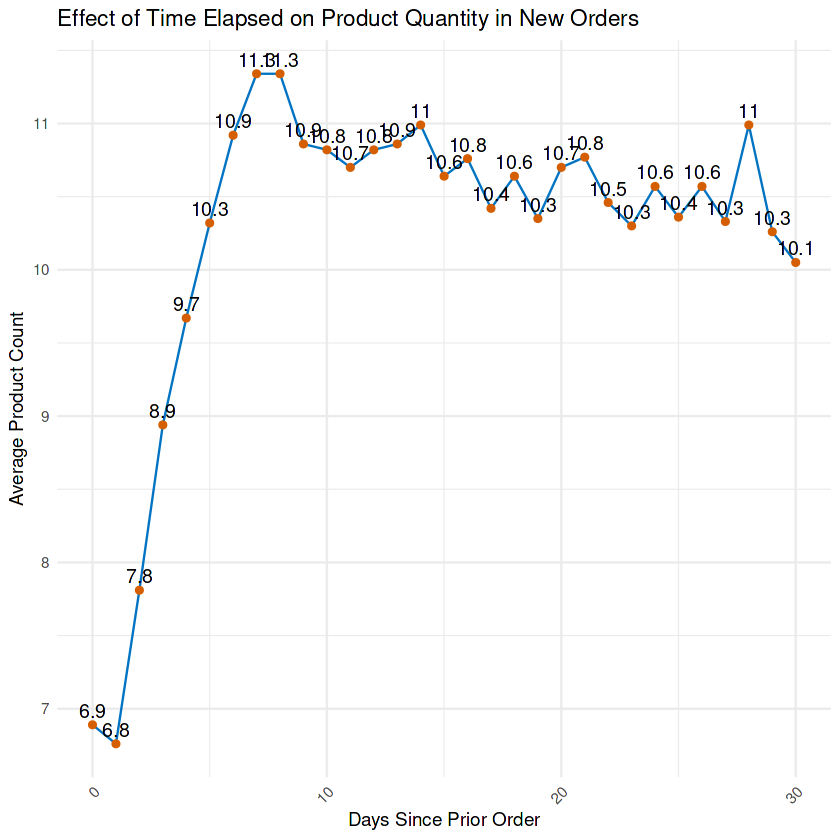

In [14]:
# Copy of data 
data_copy <- data 

# Number of products per order
data_with_product_count <- data_copy %>%
  group_by(order_id) %>%
  summarise(product_count = n(), .groups = 'drop')

# Merges the product count back with data_copy
data_merged <- data_copy %>%
  select(order_id, user_id, days_since_prior_order) %>%
  distinct() %>%
  left_join(data_with_product_count, by = "order_id")

# Excludes orders with NA in days_since_prior_order
data_filtered <- data_merged %>%
  filter(!is.na(days_since_prior_order))

# Average product count for different days_since_prior_order
analysis_data <- data_filtered %>%
  group_by(days_since_prior_order) %>%
  summarise(average_product_count = round(mean(product_count, na.rm = TRUE),2), .groups = 'drop')

# Plotting
ggplot(analysis_data, aes(x = days_since_prior_order, y = average_product_count)) +
  geom_line(color = "#0073C2FF") +  
  geom_point(color = "#D55E00") +  
  geom_text(aes(label = round(average_product_count, 1)), vjust = -0.5, size = 4, color = "black") +  
  theme_minimal() +
  labs(x = "Days Since Prior Order", y = "Average Product Count", title = "Effect of Time Elapsed on Product Quantity in New Orders") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

This graphic shows the impact of days since the last order on the quantity of products ordered in new transactions. The pattern observed offers several insights:  
- There is an initial steep increase in the quantity of products ordered as the days since the last order increase, peaking at around the 7th day. This suggests that there might be a weekly purchasing cycle for many customers, potentially tied to weekly routines.  
- After the peak, the quantity ordered seems to decrease with slight variations but generally remains higher than the initial order, suggesting a stable demand level after the initial spike.

Since the demand per client doesn't significantly fluctuate after the first week, we can see once more the necessity of creating promotions that encourage larger order sizes or more frequent purchases to stimulate growth in sales volume. This relatively consistent demand suggests also that customers have a routine shopping behavior that may make them receptive to recommendations. This means, there could be an opportunity for implementing targeted cross-selling strategies. 

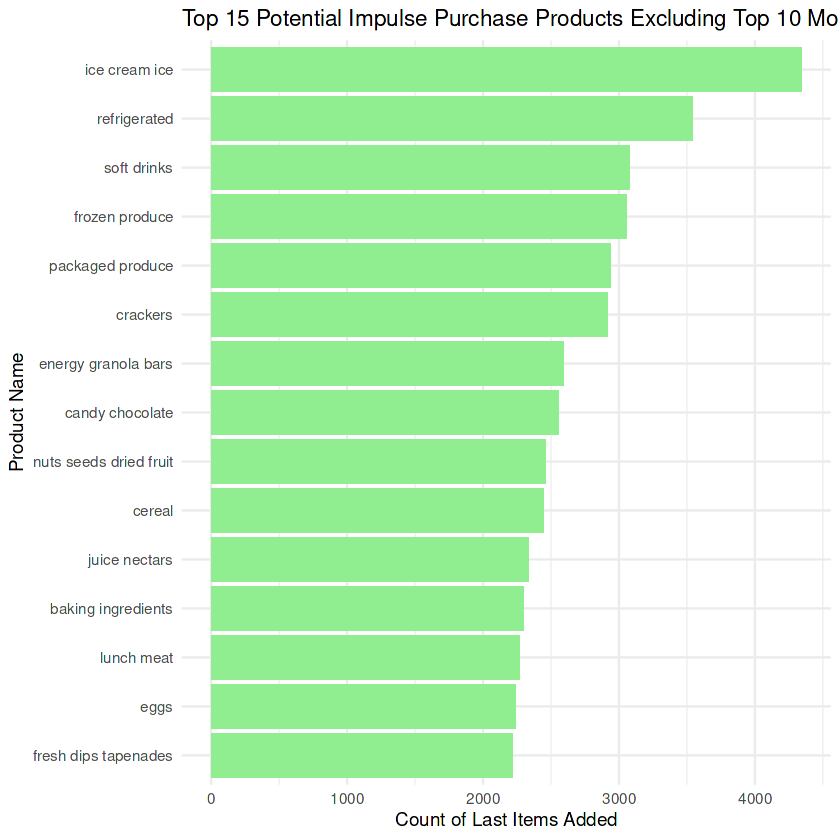

In [15]:
# Last items added to the cart in each order
last_items <- data %>%
  group_by(order_id) %>%
  mutate(max_cart_order = max(add_to_cart_order)) %>%
  filter(add_to_cart_order == max_cart_order) %>%
  ungroup() %>%
  filter(!(product_name %in% top_products$product_name)) # Excludes top 10 products

# Groups by product name  
impulse_candidates <- last_items %>%
  group_by(product_name) %>%
  summarise(count = n(), .groups = 'drop') %>%
  arrange(desc(count)) %>%
  slice(1:15) # Selects top 15

# Plotting
ggplot(impulse_candidates, aes(x = reorder(product_name, count), y = count)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  coord_flip() + # Flip for easier reading of product names
  theme_minimal() +
  labs(x = "Product Name", y = "Count of Last Items Added", title = "Top 15 Potential Impulse Purchase Products Excluding Top 10 Most Purchased")

An impulse purchase is an spontaneous decision to buy a product or service, made just before a purchase. This type of buying behavior is typically driven by emotions or feelings rather than through a deliberate, thoughtful decision-making process. This analysis tries to find the products that are most likely to trigger such impulse buying behaviors in customers.
Impulse purchases are often characterized by items added after the initial intended purchases. Products added towards the end, especially those not typically on a shopping list (like snacks, magazines, or specialty items), might be considered impulse buys. For this analysis I've found the top items added later to the cart and then filter out the 10-top purchased products, focusing on products that are less frequently purchased overall but are often added last to the cart. 
This bar plot shows the top-15 potential impulse purchase products. As we can see, the head of the list is ice cream, followed by refrigerated and soft drinks. In this list we can find some of the typical products that are often considered as impulse purchases. These are good candidates for recommendations in a tailored marketing strategy.

To effectively deploy a cross-selling strategy (aiming to suggest products or services that complement what customers are already purchasing) we must first conduct a thorough analysis of items frequently bought together. This approach will allow us to identify potential pairings and opportunities to enhance customer value and increase sales through relevant recommendations.

When APRIORI algorithm is widely extended and straightforward to understand and implement, ECLAT algorithm can offer faster performance and lower memory usage by avoiding candidate set generation and using a depth-first search approach, making it suitable for larger or denser datasets. ECLAT is the one I'm using for this analysis.

In [16]:
# ECLAT ALGORITHM

# Groups products bought together into a single transaction.
carts <- data %>%
  group_by(order_id) %>%
  summarise(cart = toString(sort(product_name))) %>%
  ungroup()

transactions_list <- strsplit(as.character(carts$cart), ",\\s*") 

# Removes single-item transactions and ensure items in a transaction are unique
filtered_transactions_list <- lapply(transactions_list, function(items) {
  unique_items <- unique(items)
  if(length(unique_items) > 1) return(unique_items) else return(NULL)
})

# Removes NULL elements (carts that ended up empty after filtering)
filtered_transactions_list <- filtered_transactions_list[!sapply(filtered_transactions_list, is.null)]

# Creates a transactions object from the filtered list
transactions <- as(filtered_transactions_list, "transactions")

# Eclat algorithm
frequent_itemsets <- eclat(transactions, parameter = list(supp = 0.01, maxlen = 20)) # 0.01 minimum support threshold to be considered frequent

# Filters itemsets to include only those with more than one item
frequent_itemsets_multi <- frequent_itemsets[which(sapply(labels(frequent_itemsets), function(x) length(unlist(strsplit(x, "[,{]"))) > 2))]

# Top 10 frequent itemsets, ensuring they consist of more than one item
inspect(sort(frequent_itemsets_multi, by = "support")[1:15])

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.01      1     20 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 1874 

create itemset ... 
set transactions ...[134 item(s), 187431 transaction(s)] done [0.16s].
sorting and recoding items ... [98 item(s)] done [0.03s].
creating sparse bit matrix ... [98 row(s), 187431 column(s)] done [0.07s].
writing  ... [3300 set(s)] done [0.85s].
Creating S4 object  ... done [0.00s].
     items                           support count
[1]  {fresh fruits,                               
      fresh vegetables}            0.3388554 63512
[2]  {fresh fruits,                               
      packaged vegetables fruits}  0.2879673 53974
[3]  {fresh vegetables,                           
      packaged vegetables fruits}  0.2502841 46911
[4]  {fresh fruits,                               
      yogurt}                      0.200847

When more than one item is listed (e.g., {fresh fruits, fresh vegetables}), it indicates that these items are frequently purchased together.
- Support: The support value is a measure of prevalence. It represents the proportion of all transactions that contain the itemset. For example, a support of 0.3388554 for {fresh fruits, fresh vegetables} means that fresh fruits and fresh vegetables were purchased together in about 33.89% of all transactions.
- Count: This column shows the absolute number of transactions that include the itemset.  

Results interpretation:  
- {Fresh Fruits, Fresh Vegetables} (Support: 0.3388554, Count: 63512):
This itemset shows a significant overlap in customers buying fresh fruits and fresh vegetables together. It's a strong indicator that customers who come in for one are likely to be interested in the other. Cross-selling opportunities could include bundled offers, discounts when both are purchased, or marketing campaigns that target buyers of one with suggestions for the other.  
- {Fresh Fruits, Packaged Vegetables Fruits} (Support: 0.2879673, Count: 53974):
Similar to the first, this combination suggests that customers purchasing fresh fruits are also inclined to buy packaged vegetables and fruits. This can inform store layout decisions (e.g., placing these items near each other in the app) and promotions that bundle fresh with packaged produce.  
- {Fresh Vegetables, Packaged Vegetables Fruits} (Support: 0.2502841, Count: 46911):
This indicates another strong relationship between the purchase of fresh vegetables and packaged vegetables/fruits. Offering deals when buying both or suggesting recipes that use both fresh and packaged produce could be effective strategies. 

We can apply this interpretation to all the 15 pairs of products listed. 

For the following analysis, I will do the same as in the previous one, but this time, instead of detecting pairs of products that are purchased together,  will display the 15 triples of products bought together.

In [17]:
# Filter itemsets to include only those with more than one item
frequent_itemsets_multi <- frequent_itemsets[which(sapply(labels(frequent_itemsets), function(x) length(unlist(strsplit(x, "[,{]"))) > 3))]

# Now inspect the top 10 frequent itemsets, ensuring they consist of more than one item
inspect(sort(frequent_itemsets_multi, by = "support")[1:15])

     items                            support count
[1]  {fresh fruits,                                
      fresh vegetables,                            
      packaged vegetables fruits}  0.19909193 37316
[2]  {fresh fruits,                                
      fresh vegetables,                            
      yogurt}                      0.12636117 23684
[3]  {fresh fruits,                                
      packaged vegetables fruits,                  
      yogurt}                      0.11288421 21158
[4]  {fresh fruits,                                
      fresh vegetables,                            
      packaged cheese}             0.11158240 20914
[5]  {fresh fruits,                                
      fresh vegetables,                            
      milk}                        0.10626844 19918
[6]  {fresh fruits,                                
      packaged cheese,                             
      packaged vegetables fruits}  0.09679829 18143
[7]  {fresh 

In this analysis we can see the 3 most common carts of products in the store. 

Implementing these findings through product bundling, targeted recommendations, inventory optimization, strategic product placement, focused marketing campaigns, and as feedback for product development, can significantly enhance cross-selling efforts.


### **Conclusions**

This analysis has revealed several key insights that not only reflect the current trends but also highlight opportunities for strategic growth and customer engagement:   

- There's a high consumer demand for fresh fruits and vegetables, evident from their status as not only the most purchased but also the most reordered items. This trend underscores a stable and ongoing demand, indicating that consumers prioritize health and freshness in their choices.  

- The data reveals a pattern in the timing of purchases, with the highest percentage of transactions occurring at the start of the week, particularly on Mondays and Tuesdays. Interestingly, Mondays and Sundays record the highest average number of products bought per user, suggesting a tendency for bulk shopping at the week's beginning and end.  

- Throughout the week, peak shopping hours span from 8 a.m. to 5 p.m., showing relatively consistent activity levels. This uniformity hints at habitual shopping behaviors among consumers, possibly tied to their daily routines.  

- Fresh vegetables, fresh fruits, and packaged vegetables/fruits consistently emerge as the top three purchased items each day of the week. This pattern reaffirms the strong demand for fresh and healthy food options, indicating a stable market for these products.  

- The reordering habits of consumers split, with 50% reordering every 10 days or less, and the remainder taking longer. This dichotomy suggests a significant margin for increasing purchase frequency and enhancing customer retention strategies.  

- An initial surge in product orders is observed as the interval since the last purchase increases, peaking around the seventh day. This suggests a weekly purchasing cycle for many customers, likely linked to routine shopping habits. Despite a subsequent drop in order quantities, demand stabilizes, indicating a consistent level of interest beyond the peak.  

- The data also hints at certain products being impulse buys, suggesting an area for potential revenue growth by strategically positioning these items to maximize visibility and appeal.  

- Items frequently bought together offer a prime opportunity for implementing effective cross-selling strategies. By leveraging these patterns, the company can enhance the shopping experience and potentially increase the average order value.

These insights collectively offer a comprehensive view of consumer purchasing behavior. By understanding and responding to these trends, the company can better meet consumer needs, optimize its offerings, and drive growth.

### **Strategic Application:**

Creating a predictive marketing strategy requires a multi-faceted approach, designed based on the insights from the analysis. The company can decide which aspect to prioritize for implementation, considering its operational capabilities and financial information. Due to the constraints outlined in the "limitations" section, these considerations were not covered in this analysis.

1. **Focus on freshness and health:** 

* Launch weekly campaigns highlighting the freshest in-season fruits and vegetables. This action can use dynamic content on the homepage of the app and in email newsletters to showcase these items.  
* Considering the products' origins, it would be beneficial to focus on the quality and value of the produce to keep current customers engaged and draw in new ones. Additionally, there's a chance to boost the company's brand image and customer loyalty by highlighting sustainable practices and local sourcing.  

2. **Timing and frequency optimization:**. 

* Aligning sales and promotions with peak shopping times is important. Introduce special offers on Mondays and Tuesdays to attract bulk purchasers and on Sundays to capture the weekend shopping surge. This could include discounts on top-selling items or bonus loyalty points.  
* Implement a predictive notification system that alerts customers when they are approaching their typical reorder date and encourage them to restock on essentials before running out.   
  
3. **Enhacing shoping experience:**. 

* Optimize the website for peak shopping hours with time-sensitive deals or flash sales, especially on fresh and healthy food options. Ensure that customer service is also ramped up during these hours to handle any inquiries or issues promptly.  
* Position the impulse buy productst identified strategically on the site, especially on checkout pages or as part of the search results for top-selling items.   
  
4. **Customer retention and purchase frequency:**

* Enhance loyalty programs to reward frequent purchases, especially for those who reorder within the 10-day window. Offer tiered rewards based on purchase frequency and amounts, such as free shipping, exclusive deals, or early access to new products.  
* Develop content marketing that educates customers on the benefits of fresh produce and healthy eating. Include recipes, storage tips, and health facts to engage users and encourage them to include more of these items in their orders.  

5. **Cross-selling and upselling:**. 

* Create attractive bundle deals for items frequently purchased together, offering them at a slightly reduced price. This can encourage customers to try new products and increase the average order value.  The full list of products has been provided in this analysis.

### **Implementation and Testing**

1. **Focus on Freshness and Health**
Pilot Phase: Launch a 'Fresh Picks of the Week' campaign for a month, featuring a selection of in-season fruits and vegetables on the website and through email marketing.  

**KPIs:**  
- Increase in sales of featured products.  
- Customer feedback on product freshness and quality.  
- Subscription rates for new subscription box options.
  
  
2. **Timing and Frequency Optimization**. 
**Pilot Phase:** For two months, introduce Monday and Tuesday specials, offering discounts on bulk purchases, and Sunday deals to encourage weekend shopping.

**KPIs:**  
- Growth in transaction numbers during peak hours.  
- Repeat purchase rate within the identified reordering window.  

3. **Enhancing Shopping Experience**
**Pilot Phase:** Implement a one-month flash sale event during peak shopping hours (8a.m. - 5p.m.), with enhanced customer service support.

**KPIs:**   

- Customer engagement metrics during peak hours (site traffic, sales conversion rates).  
- Customer service interaction satisfaction rates.  
- Number of transactions completed during flash sales.  

4. **Customer Retention and Purchase Frequency**. 
**Pilot Phase:** Roll out a loyalty program enhancement for a three-month period, featuring tiered rewards based on frequency and purchase amounts.  
  
**KPIs:**   

- Enrollment and participation rates in the loyalty program.  
- Frequency of purchases from loyalty program members vs. non-members.  
- Customer feedback and satisfaction with the loyalty program.  

5. **Cross-Selling and Up-Selling**  
**Pilot Phase:** Introduce personalized product recommendations and bundle offers on frequently bought items for a two-month trial period.  
  
**KPIs:**   

- Increase in average order value due to cross-selling and up-selling.  
- Conversion rates on recommended and bundled product offers.  
- Customer feedback on recommendation relevance and bundle appeal.

author: R.H. Amezqueta  
date: 2024-03-15